In [116]:
!pip install -q fastbook

import fastbook
fastbook.setup_book()
from fastbook import *

In [117]:
from fastai.vision.all import *



In [118]:
path= '/content/gdrive/"My Drive"/digits'
!ls {path}

train  valid


# 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
- Training and validation images collected in Lab2
- `Resize(640)` as item transform
- A size of 420 in the batch transforms
- Use a batch size of 32
- Use `set_seed()` to obtain reproducible results.
- Augmentations you find useful (see question 1)

Show a training and a validation batch.
Show augmentations, i.e. `show_batch()` with `unique=True`.

In [135]:
set_seed(42,True)
digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(640),
                 batch_tfms=aug_transforms(size=420, min_scale=1.0))


In [136]:
set_seed(42,True)
dls = digits.dataloaders('/content/gdrive/My Drive/digits')

In [ ]:
set_seed(42,True)
dls.train.show_batch(max_n=32, nrows=4)


In [ ]:
set_seed(42,True)
dls.valid.show_batch(max_n=32, nrows=4)

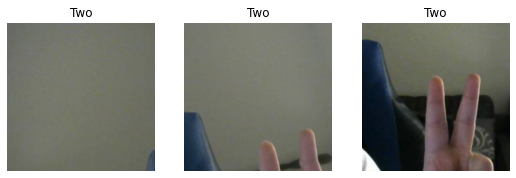

In [145]:
set_seed(42,True)
dls.show_batch(nrows=1, ncols=3, unique=True)

### Question 1: How did you choose your augmentation transfroms? Include your thought process.
*YOUR ANSWER HERE*

### Question 2: Are there any problems with your augmentations in the training data, or validation data, e.g. fingers missing, etc.?
*YOUR ANSWER HERE*


# 2. Train the classifier

## 2.1 Train a fastai cnn multi-class classifier
- ResNet18 architecture.
- accuracy as metric.
- learning rate finder to find initial learning rate.
- transfer learning with unfreezing using descriminative learning rates.
- use a batch size of 32 and the DataBlock from above.
- Use the same `set_seed()` as above to obtain reproducible results.

epoch,train_loss,valid_loss,accuracy,time
0,2.693473,4.107004,0.260000,00:09
1,2.238059,3.359573,0.340000,00:09
2,1.963950,2.048970,0.480000,00:09


AssertionError: ignored

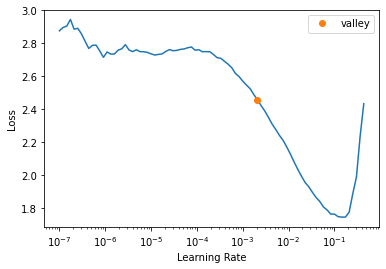

In [153]:
set_seed(42,True)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.lr_find()
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=(1e-6,1e-4))



### Question 3: How did you select the number of epochs and learning rates? 
*YOUR ANSWER HERE*


## 2.2 Experiment with different batch sizes
Using the pipeline, number of epochs, learning rates from above, re-run the pipeline with a batch size of 16, 64

### Question 4: Keeping number of epochs and learning rates the same, how are validation loss and accuracy effected by the increase and decrease of batch size? 
*YOUR ANSWER HERE*


# 3. Analyze model performance
Retrain the model with batch size of 32 from the previous section.

Plot the confusion matrix.

# 4. Save the best model to file
Save the model using `learn.export()` as `.pkl` file. Verify that the model can be reloaded and used to make predictions.

# 5. Summary and Conclusion

Summarize:
- Augmentations used
- Training strategy, including batch size, number of epochs and learning rates.
- Accuracy achieved, summary of confusion matrix

*YOUR ANSWER HERE*


Conclusion:
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


# 6.Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE*
